# Project: Investigate No-show Appointments Datasets
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (what factors are important?)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 

This is an attempt to answer the following question:

**Q**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

**NOTE**: Encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Load data into Jupiter

In [34]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
from matplotlib import pylab
from datetime import datetime
import seaborn as sns
import re
%matplotlib inline
sns.set_style("whitegrid")

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling
In this part we will look into the dataset and perform some basic analysis such as describe comand to get better underestanding of the data.

### General Properties

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.shape

(110527, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.mean()

PatientId        1.474963e+14
AppointmentID    5.675305e+06
Age              3.708887e+01
Scholarship      9.826558e-02
Hipertension     1.972459e-01
Diabetes         7.186479e-02
Alcoholism       3.039981e-02
Handcap          2.224796e-02
SMS_received     3.210256e-01
dtype: float64

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
df.describe(include="all")


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### Data Cleaning /Casting

In [13]:
for feature in ["Diabetes", "Alcoholism", "Hipertension", "Handcap",
                "Scholarship", "SMS_received", "Neighbourhood"]:
    print("{}: {}".format(feature, df[feature].unique()))

Diabetes: [0 1]
Alcoholism: [0 1]
Hipertension: [1 0]
Handcap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'DO MOSCOSO'
 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE'
 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO' 'BOA VISTA'
 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'

In [35]:
# some rows have negative age value. I impute them with age mode! 
#df.loc[df.Age < 0, "Age"] = int(df.Age.mode())
df = df[(df.Age >= 0) & (df.Age <= 95)]


In [36]:
boolean_features = ["Diabetes", "Alcoholism", "Hipertension", "SMS_received", "Scholarship"]
categorical_features = ["Gender", "Handcap"]

df.Age = df.Age.astype("int")
df.PatientId = df.PatientId.astype("int")
df.AppointmentID = df.AppointmentID.astype("int")

for feature in boolean_features:
    df[feature] = df[feature].astype("bool")

for feature in categorical_features:
    df[feature] = df[feature].astype("category")


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null category
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null category
SMS_received      110527 non-null bool
No-show           110527 non-null object
dtypes: bool(5), category(2), int64(3), object(4)
memory usage: 6.6+ MB


In [17]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,No


In [37]:
#change name of no-show column to no_show for easier access going forward
df.columns = df.columns.str.replace('-', '_')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110480 non-null int64
AppointmentID     110480 non-null int64
Gender            110480 non-null category
ScheduledDay      110480 non-null object
AppointmentDay    110480 non-null object
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null bool
Hipertension      110480 non-null bool
Diabetes          110480 non-null bool
Alcoholism        110480 non-null bool
Handcap           110480 non-null category
SMS_received      110480 non-null bool
No_show           110480 non-null object
dtypes: bool(5), category(2), int64(3), object(4)
memory usage: 7.5+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,No


## Feature engineering
I converted the string datetime column to a datetime object so we can extract day of week along with other information from the object.

In [38]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['Scheduled_weekday'] = df['ScheduledDay'].dt.weekday_name
df['Appointment_weekday'] = df['AppointmentDay'].dt.weekday_name

df['Scheduled_weekday_ind'] = df['ScheduledDay'].apply(lambda x: x.weekday())
df['Appointment_weekday_ind'] = df['AppointmentDay'].apply(lambda x: x.weekday())

df['Gender_ind'] = df.Gender.apply(lambda x: 0 if(x=='F') else 1)
df['Status'] = df.No_show.apply(lambda x: 0 if(x=='Yes') else 1)



In [39]:
# Percent of no-show 
no_show = df.loc[df.No_show == "Yes"]
show = df.loc[df.No_show == "No"]
len(no_show)/(len(no_show)+len(show))

0.20195510499637945

## Data Visualization 

In this section, I created several plot of the variables and performed basic analysis to uncover possible correlation between target variable (No_show column) and the independent variables.

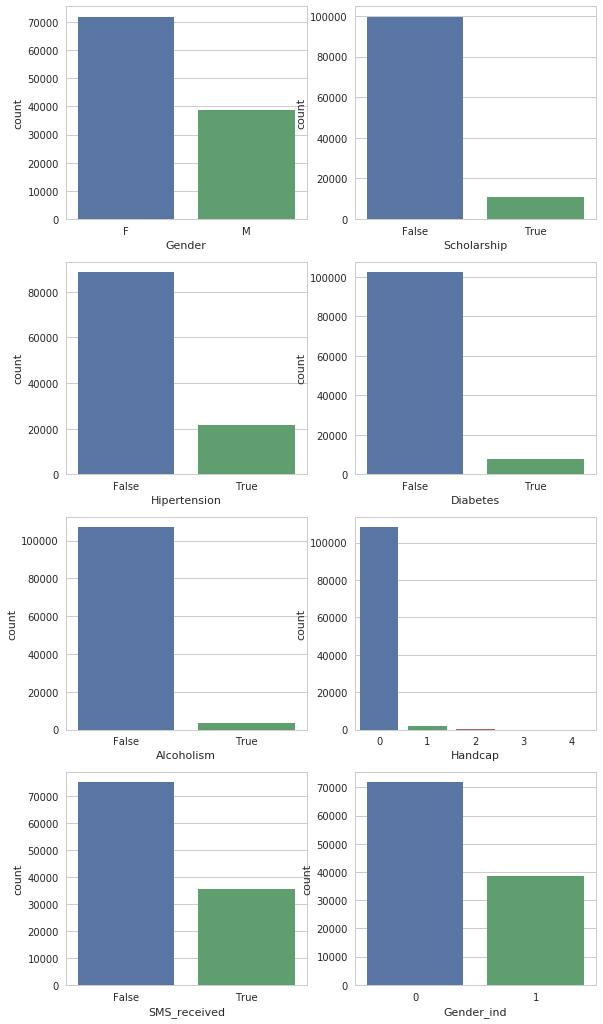

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(9.5,18))
gs = gridspec.GridSpec(4, 2)

features = df.select_dtypes(include=["category", "bool"])
#features = df['Gender']
for i, feature in enumerate(features):
    ax = plt.subplot(gs[(i // 2), (i % 2)])
    sns.countplot(df[feature], ax=ax)


<a id='eda'></a>
## Exploratory Data Analysis


### Any correlation between Age of patients and No-Show status?

So apparently age is correlated with No_show in a sense that older patients relatively tend to show up more than younger patients.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


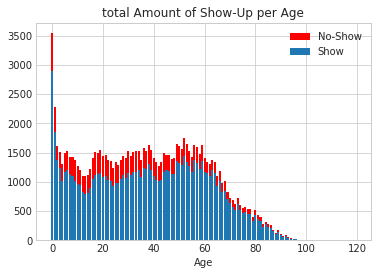

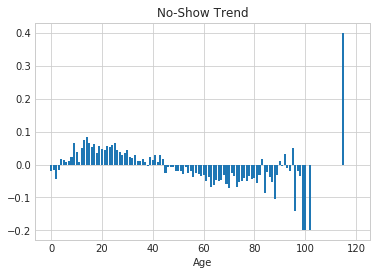

In [21]:
import matplotlib.pyplot as plt
columns = df.columns
age_range = range(120)
age_show = np.zeros(120)
age_no_show = age_show.copy()

no_show_age_count = no_show.groupby('Age').Age.count()
show_age_count = show.groupby('Age').Age.count()
#print(no_show_age_count)
for index, count in zip(no_show_age_count.index, no_show_age_count.values):
    #print(index)
    age_no_show[index] = count

for index, count in zip(show_age_count.index, show_age_count.values):
    age_show[index] = count

percentage = age_show.copy()
for index, value in enumerate(age_no_show):
    x = value/(percentage[index]+value)
    percentage[index] = 0.2 if np.isnan(x) else x

below_or_above = percentage - 0.2

plt.bar(age_range, age_no_show, bottom=age_show, color='red', label='No-Show')
plt.bar(age_range, age_show, label='Show')
plt.legend()
plt.title('total Amount of Show-Up per Age')
plt.xlabel('Age')
plt.show()
#plt.show()
plt.bar(age_range, below_or_above)
plt.title('No-Show Trend')
plt.xlabel('Age')
plt.show()

Text(0.5,1,'Probability of showing up with respect to Age')

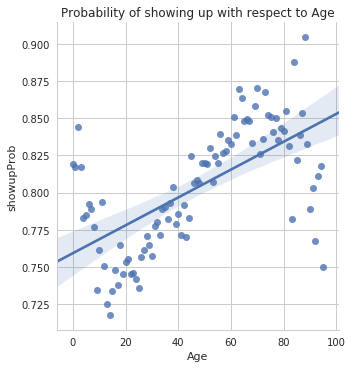

In [51]:
import matplotlib.pyplot as plt
def showupProb(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.No_show).reset_index()
    df['showupProb'] = df['No'] / (df['No'] + df['Yes'])
    return df[[group_by, 'showupProb']]
sns.lmplot(data = showupProb(df, 'Age'), x = 'Age', y = 'showupProb', fit_reg = True)
ax = plt.gca()
ax.set_title("Probability of showing up with respect to Age")

### Any correlation between Gender of patients and No-Show status?
No correlation between gender of patients and No_show status.

In [22]:
female = df.Status[df.Gender_ind ==0]
male = df.Status[df.Gender_ind ==1]
percent_male = 1-sum(male)/len(male)
percent_female = 1-sum(female)/len(female)

print('Percent of male No-Show: %f'%(percent_male))
print('Percent of female No-Show: %f'%(percent_female))

Percent of male No-Show: 0.199679
Percent of female No-Show: 0.203146


## What about rest of variables?

In [23]:
columns = ['Hipertension', 'Alcoholism', 'Scholarship', 'Handcap', 'Diabetes']
#print(data.columns)
for column in columns:
    k = df.Status[df[column]==0]
    l = df.Status[df[column]==1]
    percent_m = 1-sum(k)/len(k)
    percent_f = 1-sum(l)/len(l)

    print('Percent of non '+column+' No-Show: %f'%(percent_m))
    print('Percent of  '+column+' No-Show: %f'%(percent_f))

Percent of non Hipertension No-Show: 0.209037
Percent of  Hipertension No-Show: 0.173020
Percent of non Alcoholism No-Show: 0.201946
Percent of  Alcoholism No-Show: 0.201488
Percent of non Scholarship No-Show: 0.198072
Percent of  Scholarship No-Show: 0.237363
Percent of non Handcap No-Show: 0.202353
Percent of  Handcap No-Show: 0.179236
Percent of non Diabetes No-Show: 0.203628
Percent of  Diabetes No-Show: 0.180033


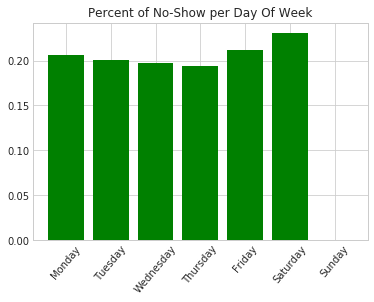

In [21]:
# Day Of The Week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for index, weekday in enumerate(weekdays):
    k = df.Status[df.Appointment_weekday == weekday]
    if len(k) != 0:
        percent_m = 1-sum(k)/len(k)
    else:
        percent_m = 0
    plt.bar(index, percent_m, color='green')
    
plt.xticks(range(len(weekdays)),weekdays, rotation=50)
plt.title('Percent of No-Show per Day Of Week')
plt.show()

Text(0.5,1,'Probability of showing up')

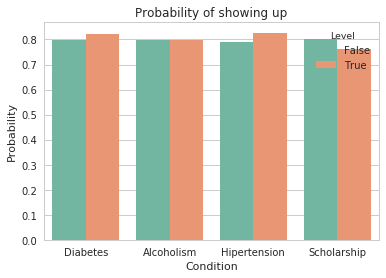

In [55]:
def catVarProb(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df.No_show == 'No')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows) 

sns.barplot(data = catVarProb(['Diabetes', 'Alcoholism', 'Hipertension',
                                          'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
ax = plt.gca()
ax.set_title("Probability of showing up")

Text(0.5,1,'Probability of showing up')

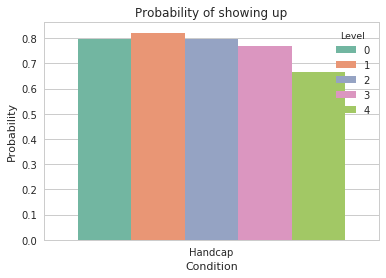

In [56]:
sns.barplot(data = catVarProb(['Handcap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
ax = plt.gca()
ax.set_title("Probability of showing up")

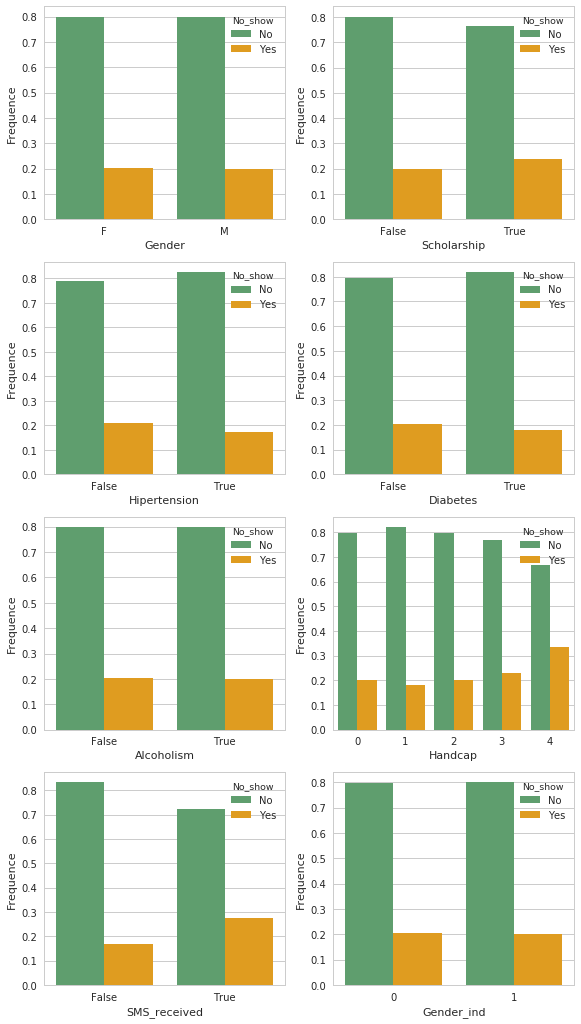

In [19]:

plt.figure(figsize=(9.5,18))
gs = gridspec.GridSpec(4, 2)

features = df.select_dtypes(include=["category", "bool"])

for i, feature in enumerate(features):
    
    feature_counts = (df.groupby([feature])["No_show"]
                            .value_counts(normalize=True)
                            .rename('frequence')
                            .reset_index()
                            .sort_values(feature))
    
    ax = plt.subplot(gs[(i // 2), (i % 2)])
    plot = sns.barplot(x=feature, y="frequence", hue="No_show",
                       data=feature_counts, ax=ax, palette={"No": "g", "Yes": "orange"})
    plot.set_ylabel("Frequence")
    plot.set_xlabel(feature)



<a id='conclusions'></a>
## Conclusions

Overall, gender and alcoholism do not play a significant role in predicting no-show status of a patient. On the other hand, patients with hypertension and/or diabetes tend to show more comparing to those without such conditions. I found out that kids, teens patients (younger than 18) and midages (patients older than 43 year-old upto age 80) tends to show up more for their appoinments in contrast with young (ages between 18 to 43) patients that appear to not show up for the appointment more frequently. Also, I found out that Saturday has the highest rate of showup amongst other weekdays. Which kind of make sense as many people might have more free time during weekends. Non Scholarship patients appear to show up more whereas scholarship patients.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])